In this chapter you will discover the conceptual framework behind logistic regression and SVMs. This will let you delve deeper into the inner workings of these models.

# 1- Linear classifiers: the coefficients


video

# 2- How models make predictions


Which classifiers make predictions based on the sign (positive or negative) of the raw model output?



# 3- Changing the model coefficients


<p>When you call <code>fit</code> with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with <code>fit</code>), and visualize the resulting classifiers.</p>
<p>A 2D dataset is already loaded into the environment as <code>X</code> and <code>y</code>, along with a linear classifier object <code>model</code>.</p>

<ul>
<li>Set the two coefficients and the intercept to various values and observe the resulting decision boundaries.</li>
<li>Try to build up a sense of how the coefficients relate to the decision boundary.</li>
<li>Set the coefficients and intercept such that the model makes no errors on the given training data.</li>
</ul>

In [ ]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

# 4- What is a loss function?


video

# 5- The 0-1 loss

<p>In the figure below, what is the
0-1 loss (number of classification errors) of the classifier?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/01_loss_single.png" alt></p>

# 6- Minimizing a loss function


<p>In this exercise you&apos;ll implement linear regression &quot;from scratch&quot; using <code>scipy.optimize.minimize</code>.</p>
<p>We&apos;ll train a model on the Boston housing price data set, which is already loaded into  the variables <code>X</code> and <code>y</code>. For simplicity, we won&apos;t include an intercept in our regression model.</p>

<ul>
<li>Fill in the loss function for least squares linear regression.</li>
<li>Print out the coefficients from fitting sklearn&apos;s <code>LinearRegression</code>.</li>
</ul>

In [5]:
# This done by me to train boosten data 
import pandas as pd 
from sklearn.linear_model import LinearRegression


# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/boston.csv')
#Get the features
X=df.drop('MEDV', axis=1).values
#Get the target 
y=df['MEDV'].values



In [13]:
from scipy.optimize import minimize

# The squared error, summed over training examples
def my_loss(w):
    s=0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w @ X[i]   # Dot Product 
        s = s + (y_i_true - y_i_pred)**2
    
    return s

# Returns the w that makes my_loss(w) smallest
w_fit=minimize(my_loss, X[0]).x
print(w_fit)



[-9.28967286e-02  4.87153060e-02 -4.05715986e-03  2.85398885e+00
 -2.86831908e+00  5.92815052e+00 -7.26945050e-03 -9.68512387e-01
  1.71156442e-01 -9.39665803e-03 -3.92187377e-01  1.49054675e-02
 -4.16304464e-01]


In [38]:
# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-4.92437746e-01 -2.95803903e-02  8.73469595e-02 -5.94023311e-04
  1.23582595e+01 -1.78054451e+00  1.31113437e+00 -2.69227361e+01
  1.78339061e+00]


# 7- Loss function diagrams


video

# 8- Classification loss functions


<p>Which of the four loss functions makes sense for classification?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choice_loss_diagram.png" alt></p>

# 9- Comparing the logistic and hinge losses

<p>In this exercise you&apos;ll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.</p>
<p>The loss function diagram from the video is shown on the right.</p>

<ul>
<li>Evaluate the <code>log_loss()</code> and <code>hinge_loss()</code> functions <strong>at the grid points</strong> so that they are plotted.</li>
</ul>

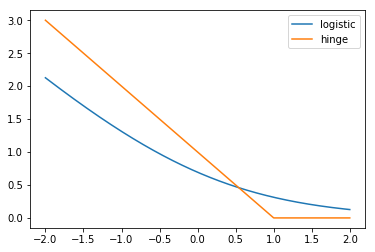

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1 + np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

# 10- Implementing logistic regression

<p>This is very similar to the earlier exercise where you implemented linear regression &quot;from scratch&quot; using <code>scipy.optimize.minimize</code>. However, this time we&apos;ll minimize the logistic loss and compare with scikit-learn&apos;s <code>LogisticRegression</code> (we&apos;ve set <code>C</code> to a large value to disable regularization; more on this in Chapter 3!).</p>
<p>The <code>log_loss()</code> function from the previous exercise is already defined in your environment, and the <code>sklearn</code> breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables <code>X</code> and <code>y</code>.</p>

<ul>
<li>Input the number of training examples into <code>range()</code>.</li>
<li>Fill in the loss function for logistic regression.</li>
<li>Compare the coefficients to sklearn&apos;s <code>LogisticRegression</code>.</li>
</ul>

In [40]:
#This by me, I do not know if this like what done on DataCamp server

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/cancer.csv')

#Diagnosis (M = malignant, B = benign)

df=df.replace('M', -1)
df=df.replace('B',  1)

#Get the features
x=df.drop(['diagnosis', 'id'], axis=1).values

#get the 10 first features
X=x[:, :9]

#Get the target 
y=df['diagnosis'].values


#Without standardized

In [41]:
#From DataCamp

from sklearn.linear_model import LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(0,569):
        raw_model_output = w @ X[i]
        s = s + log_loss((raw_model_output * y[i]))
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01]
[[  4.34192284  -0.30380967  -0.17878695  -0.04833629 -26.29546086
   -6.76697352  -3.9474034  -32.49212611 -16.61549452]]


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
